### Author: Olufemi Victor Tolulope
##### Building a Simple Classification Deep learning model with fastai

In this same module, i've explained in details how you can do image regression with FastAI. The next two notebooks follow pretty much the same syntax, so I'll only explain the new stuffs here. Refer to my notebook on creating the Age model to understand the simple steps done below.

In [2]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6K_dV3Ksq_skuAnRFt8qtvKrpu7sHa49z5ejjvt8HSAhOkejTKucM
Mounted at /content/drive/


In [3]:
import os
import pandas as pd
import numpy as np
from PIL import Image as PImage # TO avoid confusion later
import matplotlib.pyplot as plt

In [4]:
!cp '/content/drive/MyDrive/machine learning stories/Ethnicity_and_co/UTKface_inthewild/part1.tar.gz' . # You may have them stored in a folder, in which case modify the path.
!cp '/content/drive/MyDrive/machine learning stories/Ethnicity_and_co/UTKface_inthewild/part2.tar.gz' . # You may have them stored in a folder, in which case modify the path.
!cp '/content/drive/MyDrive/machine learning stories/Ethnicity_and_co/UTKface_inthewild/part3.tar.gz' . # You may have them stored in a folder, in which case modify the path.

In [5]:
!tar xf part1.tar.gz
!tar xf part2.tar.gz
!tar xf part3.tar.gz

In [6]:
first_image_set = ["part1/"+i for i in os.listdir("part1")]
second_image_set = ["part2/"+i for i in os.listdir("part2")]
third_image_set = ["part3/"+i for i in os.listdir("part3")]

In [7]:
print("The number of files in first set is",len(first_image_set))
print("The type of first set is",type(first_image_set))
print("The number of second in first set is",len(second_image_set))
print("The type of second set is", type(second_image_set))
print("The number of third in first set is", len(third_image_set))
print("The type of third set is",type(third_image_set))

The number of files in first set is 10137
The type of first set is <class 'list'>
The number of second in first set is 10719
The type of second set is <class 'list'>
The number of third in first set is 3253
The type of third set is <class 'list'>


In [8]:
all_paths = first_image_set+second_image_set+third_image_set
print("There are",len(all_paths),"images in total")

There are 24109 images in total


In [9]:
faulty=[]
for i in all_paths:
  try:
    (i.split("_")[3])
    int(i.split("_")[1])
  except:
    faulty.append(i)
print(faulty)

['part1/61_3_20170109150557335.jpg', 'part1/61_1_20170109142408075.jpg', 'part2/53__0_20170116184028385.jpg', 'part2/39_1_20170116174525125.jpg', 'part3/.DS_Store']


In [10]:
for i in faulty:
  all_paths.remove(i)
print("There are now",len(all_paths),"images in total")

There are now 24104 images in total


In [11]:
df = pd.DataFrame(all_paths, columns=["file_paths"])
df.tail()

file_paths
24099  part3/45_0_3_20170119202703548.jpg
24100  part3/14_0_1_20170116205011065.jpg
24101  part3/26_0_3_20170119180328460.jpg
24102  part3/47_0_3_20170119205154121.jpg
24103  part3/73_0_0_20170120230238642.jpg

In [12]:
age = [int(i.split("_")[0][6:]) for i in all_paths]
gender = [int(i.split("_")[1]) for i in all_paths]
race = [int(i.split("_")[2]) for i in all_paths]

In [13]:
df["age"] = age
df["gender"] = gender
df["race"] = race
df.head()

file_paths  age  gender  race
0   part1/7_1_4_20161221193133117.jpg    7       1     4
1  part1/58_0_2_20170104185526166.jpg   58       0     2
2  part1/26_0_0_20170105162648388.jpg   26       0     0
3   part1/4_1_4_20170103230707056.jpg    4       1     4
4  part1/31_1_2_20170109141257277.jpg   31       1     2

In [14]:
df.gender = df.gender.map({0:"male",1:"female"})
df.race = df.race.map({0:"White",1:"Black",2:"Asian",3:"Indian",4:"Hispanic,Latino or Middle Eastern"})

In [15]:
df.head()
df.to_csv("data.csv", index=False)

In [16]:
print(df.gender.value_counts(),"\n")
print(df.race.value_counts())

male      12582
female    11522
Name: gender, dtype: int64 

White                                10222
Black                                 4558
Indian                                4027
Asian                                 3586
Hispanic,Latino or Middle Eastern     1711
Name: race, dtype: int64


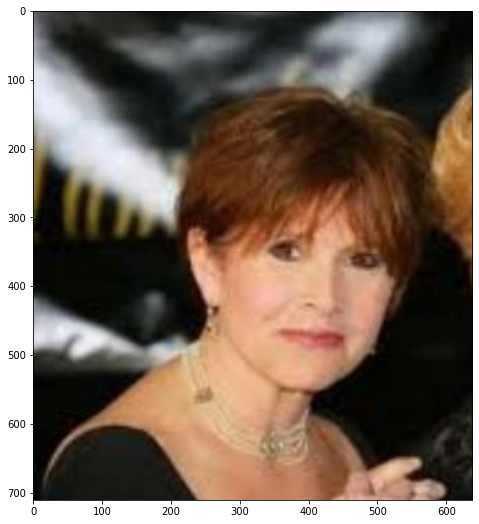

In [17]:
im = PImage.open('part2/53__0_20170116184028385.jpg')
fig,ax = plt.subplots(figsize=(9,9))
plt.imshow(im)

In [18]:
!pip install -q --upgrade fastai # Make sure we have the latest fastai

     |████████████████████████████████| 204kB 28.2MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 


In [19]:
from fastai.vision.all import *

In [20]:
import fastai
print(fastai.__version__ ) 

2.3.1


###### Here I used the CategoryBlock since I'm performing an image classification task.

In [21]:
human = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    splitter=RandomSplitter(valid_pct=0.2, seed=2021),
    get_x = ColReader(0),
    get_y=ColReader(2),
    item_tfms=Resize(224))
dls = human.dataloaders(df)

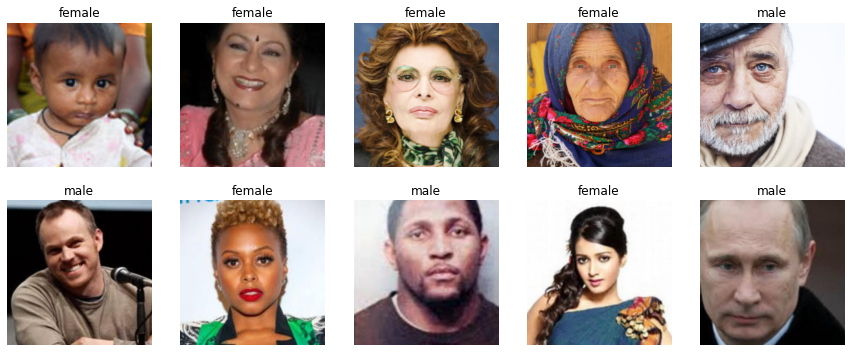

In [22]:
dls.valid.show_batch(max_n=10, nrows=2)

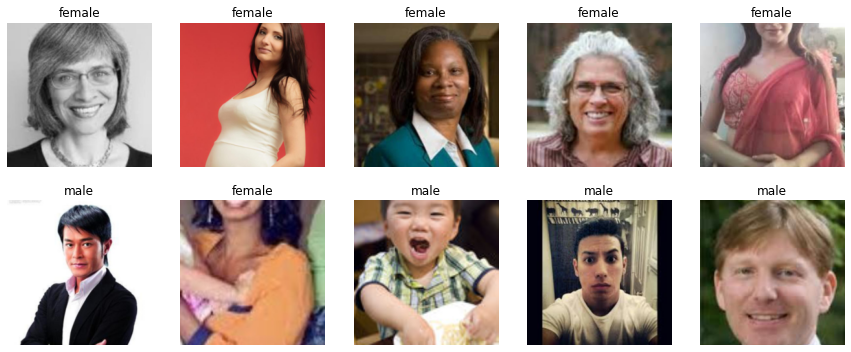

In [23]:
dls.train.show_batch(max_n=10, nrows=2)

In [24]:
"""human=human.new(item_tfms=Resize(224),batch_tfms=aug_transforms())
dls = human.dataloaders(df)
dls.train.show_batch(max_n=4, nrows=1)"""

'human=human.new(item_tfms=Resize(224),batch_tfms=aug_transforms())\ndls = human.dataloaders(df)\ndls.train.show_batch(max_n=4, nrows=1)'

In [25]:
import torchvision.models as models
learn = cnn_learner(dls, models.mobilenet_v2, cut=-1,metrics=accuracy)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


From the Just concluded training, our model acheived an accuracy of 91.6 percent which is pretty good.

The Confusion Matrix below shows you how many the model predicted correctly and wrongly in the validation set. You'll find below that the Image predicted 191 males as Females and 213 Females as Males. We'll check out the top losses below. 

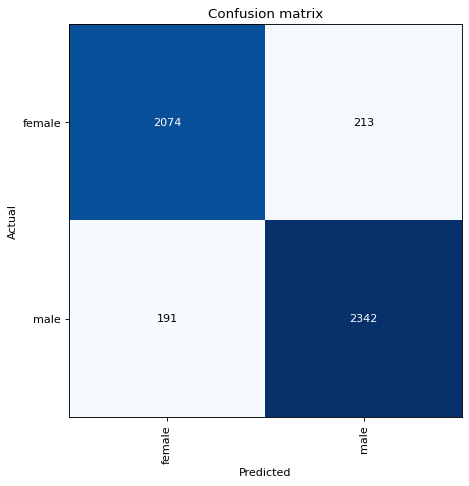

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize = (6,6), dpi = 80)

Let's print out the images that were predicted wrongly and see why?

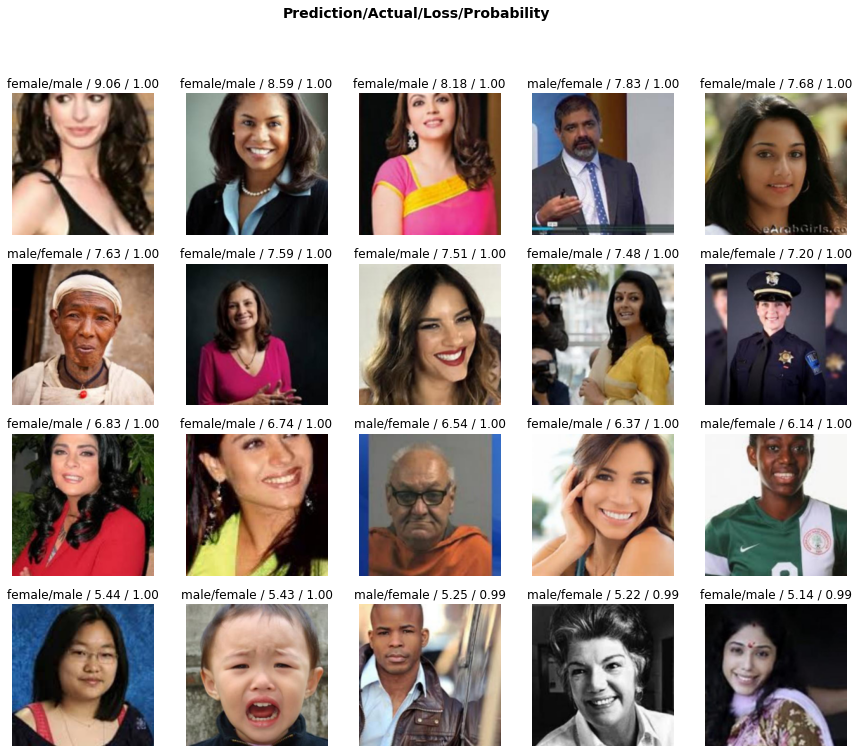

In [35]:
interp.plot_top_losses(20, nrows=4)

Our model is actually super Awesome! you'll find that it's the labelling from UTK that's actually wrong and not the model. This shows you how super pretrained models are. 

In [36]:
learn.export()

In [37]:
learn_inf = load_learner('export.pkl', )

('male', tensor(1), tensor([5.7604e-04, 9.9942e-01]))


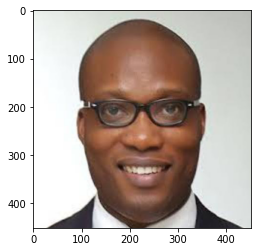

In [39]:
print(learn_inf.predict('part1/36_0_1_20170104172819875.jpg')) #change to your custom imagepath
im = PImage.open('part1/36_0_1_20170104172819875.jpg') #change to your custom imagepath
fig,ax = plt.subplots(figsize=(4,4))
plt.imshow(im)

Do some Custom Inference

('male', tensor(1), tensor([0.0941, 0.9059]))


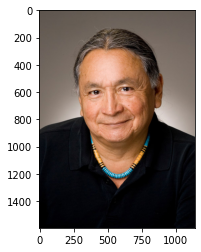

In [40]:
print(learn_inf.predict('/content/aljnaycepveqbedxhsklixyjodpcho.jpg')) #change to your custom imagepath
im = PImage.open('/content/aljnaycepveqbedxhsklixyjodpcho.jpg') #change to your custom imagepath
fig,ax = plt.subplots(figsize=(4,4))
plt.imshow(im)

('female', tensor(0), tensor([9.9992e-01, 7.5256e-05]))


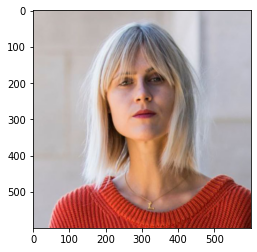

In [41]:
print(learn_inf.predict('/content/dihlagwlolbphxxdxmfbsmaeqqqcgs.jpeg')) #change to your custom imagepath
im = PImage.open('/content/dihlagwlolbphxxdxmfbsmaeqqqcgs.jpeg') #change to your custom imagepath
fig,ax = plt.subplots(figsize=(4,4))
plt.imshow(im)

The Probabilities are quite strong, the model is 90.5 percent sure for the male prediction and 99.99 percent sure for the Female prediction. Inference here is not bad, try with your own custom images.

I'll store my model in my google drive.

In [42]:
!cp "/content/export.pkl" -r "/content/drive/MyDrive/machine learning stories/Ethnicity_and_co/Gender model micro"

I am always open to assist enthusiasts with difficulties they are facing in Machine learning and Deep learning. Feel free to reach out to me:

. [Twitter](https://twitter.com/Osinkoluolufemi).

. [Linkedin](https://www.linkedin.com/in/olufemi-victor-tolulope).

. [Github](https://github.com/osinkolu)